In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

VERSION = "2.1"
DIR = "/home/julian/Documents/ndnrtc_testing/evaluation/bandwidth_evaluation_" + VERSION + "_results"

# read in csv file
df = pd.read_csv(DIR + '/run_overview.csv', delimiter='\t', index_col=False)

# transform columns names to lower case
df.columns = [col.lower() for col in df]

# ensuring backwards compatibility
df.rename(columns={"adaption":"init._res."}, inplace=True)

# ensuring forwards compatibility
df.rename(columns={"retr._total":"retransmissions"}, inplace=True)

df.head(10)

,setting,run,init._res.,shaping_profile,bandwith(cons),frames_missing,retr._max,retransmissions,psnr,ssim,vmaf
0,0,0,low,CONS,50000,82,14,27,21.15,0.891434,39.440859
1,0,1,low,CONS,50000,3,10,29,32.24,0.904592,39.653046
2,0,2,low,CONS,50000,4,5,10,32.24,0.904545,39.653046
3,0,3,low,CONS,50000,78,15,15,21.16,0.891659,39.440859
4,0,4,low,CONS,50000,3,4,7,32.24,0.904545,39.653046
5,0,5,low,CONS,50000,4,6,12,32.24,0.904499,39.653046
6,0,6,low,CONS,50000,77,14,20,21.16,0.891659,39.440859
7,0,7,low,CONS,50000,3,11,39,32.24,0.904592,39.653046
8,0,8,low,CONS,50000,4,4,7,32.24,0.904545,39.653046
9,1,0,low,CONS,22000,150,28,66,21.05,0.880516,39.092742


In [2]:
# get list of setting numbers without duplicates
settingNumbers = df["setting"].unique()
# create empty list
list_tmp = []

for setting in settingNumbers:
    # get all runs within a setting
    group = df[df["setting"] == setting]
    
    # get last line of that group as DataFrame
    part1 = pd.DataFrame(group[-1:])
    # cut off last few columns and reset index to 0
    part1 = part1[part1.columns[:-6]].reset_index().drop("index", axis = 1)
    
    # calculate mean values for group, transpose and cut off first few columns   
    part2 = pd.DataFrame(group.mean()["frames_missing":"vmaf"]).T
    # add suffix to column names
    for col in part2.columns:
        part2.rename(columns={col:col+"_mean"}, inplace=True)
    
    # calculate std deviation values for group, transpose and cut off first few columns   
    part3 = pd.DataFrame(group.std()["frames_missing":"vmaf"]).T
    # add suffix to column names
    for col in part3.columns:
        part3.rename(columns={col:col+"_std"}, inplace=True)
        
    # put parts together and store row in list
    list_tmp.append(pd.concat([part1, part2, part3], axis=1, ignore_index=False))

# concatenate all rows in list into a DataFrame
df_c = pd.concat(list_tmp, axis=0, ignore_index=True, sort=False)
df_c.sort_values(by=['init._res.', 'bandwith(cons)'], ascending=False, inplace=True)
df_c.head(15)

,setting,run,init._res.,shaping_profile,bandwith(cons),frames_missing_mean,retr._max_mean,retransmissions_mean,psnr_mean,ssim_mean,vmaf_mean,frames_missing_std,retr._max_std,retransmissions_std,psnr_std,ssim_std,vmaf_std
10,10,8,med,CONS,50000,170.111111,140.777778,424.555556,27.018889,0.933625,38.745857,38.348548,73.470705,160.655774,4.884469,0.008991,0.185863
40,40,9,med,CONS,48000,387.500000,234.750000,1426.200000,23.403500,0.910938,36.281430,261.993672,111.657783,886.319213,4.002713,0.014322,3.968473
41,41,9,med,CONS,46000,484.700000,254.300000,1990.550000,25.228500,0.907970,34.119215,374.304984,101.967023,1334.380064,6.515794,0.032854,7.425291
42,42,9,med,CONS,44000,502.850000,211.600000,1580.100000,24.321000,0.898716,34.091557,382.957916,108.974840,922.232868,5.926972,0.063023,6.943238
43,43,9,med,CONS,42000,569.100000,251.600000,2454.150000,25.154500,0.899855,32.530925,399.570414,169.619202,2407.694251,7.450624,0.057594,7.894763
44,44,9,med,CONS,40000,474.150000,234.650000,1704.650000,23.191000,0.903516,34.389326,350.073267,131.070602,838.000457,5.253753,0.029269,7.051802
45,45,9,med,CONS,38000,458.000000,286.450000,2114.350000,24.252000,0.901596,34.398629,308.432881,149.506372,1212.178303,4.766015,0.030189,6.666600
46,46,9,med,CONS,36000,598.150000,257.700000,1720.650000,21.640000,0.885277,32.125489,406.145589,134.256275,958.138561,5.803517,0.041290,8.125399
47,47,9,med,CONS,34000,505.000000,295.200000,2406.050000,20.877500,0.865691,34.302606,344.345298,137.122151,1258.285445,4.683532,0.072962,6.268027
48,48,9,med,CONS,32000,579.500000,270.950000,2242.400000,21.143500,0.877630,32.386046,381.552438,141.792092,1028.389922,5.010690,0.036151,7.245680


In [3]:
def plotBandwidth (label):
    
    bandwidth_low = df_c[df_c["init._res."] == "low"]["bandwith(cons)"]
    bandwidth_med = df_c[df_c["init._res."] == "med"]["bandwith(cons)"]
    bandwidth_high = df_c[df_c["init._res."] == "high"]["bandwith(cons)"]

    mean_low = df_c[df_c["init._res."] == "low"][label + "_mean"]
    mean_med = df_c[df_c["init._res."] == "med"][label + "_mean"]
    mean_high = df_c[df_c["init._res."] == "high"][label + "_mean"]
    
    std_low = df_c[df_c["init._res."] == "low"][label + "_std"]
    std_med = df_c[df_c["init._res."] == "med"][label + "_std"]
    std_high = df_c[df_c["init._res."] == "high"][label + "_std"]
    
    xaxis_step = 1000
    if len(df["bandwith(cons)"].unique()) > 20 :
           xaxis_step = 2000
    
    plt.errorbar(bandwidth_low, mean_low, std_low, color="lightsalmon", marker="s", markerSize=4, elinewidth=1, capsize=2, label='low')
    plt.errorbar(bandwidth_med, mean_med, std_med, color="chocolate", marker="v", markerSize=4, elinewidth=1, capsize=2, label='med')
    plt.errorbar(bandwidth_high, mean_high, std_high, color="saddlebrown", marker="o", markerSize=4, elinewidth=1, capsize=2, label='high')
    plt.title("Performance under Bandwidth Restrictions")
    plt.xlabel("bandwidth [bit/s]")
    plt.ylabel(label)
    plt.gca().invert_xaxis()
    plt.xticks(np.arange(df["bandwith(cons)"].min(), df["bandwith(cons)"].max()+1000, step=xaxis_step), rotation=70)
    if VERSION == "3.0":
        plt.axvline(x=3000, color="green", linewidth=0.1)
        plt.axvline(x=4000, color="orange", linewidth=0.1)
        plt.axvline(x=10000, color="red", linewidth=0.1)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(DIR + "/bandwidth_" + label + ".pdf")

graph1 = plt.subplot(511)
plotBandwidth("psnr")
plt.setp(graph1.get_xticklabels(), visible=False)
plt.xlabel("")

graph2 = plt.subplot(512)
plotBandwidth("ssim")
plt.setp(graph2.get_xticklabels(), visible=False)
plt.xlabel("")

graph3 = plt.subplot(513)
plotBandwidth("vmaf")
plt.setp(graph3.get_xticklabels(), visible=False)
plt.xlabel("")

graph4 = plt.subplot(514)
plotBandwidth("frames_missing")
plt.setp(graph4.get_xticklabels(), visible=False)
plt.xlabel("")

graph5 = plt.subplot(515)
plotBandwidth("retransmissions")
plt.setp(graph5.get_xticklabels(), visible=True)

plt.savefig(DIR + "/bandwidth_combined.pdf")
plt.show()

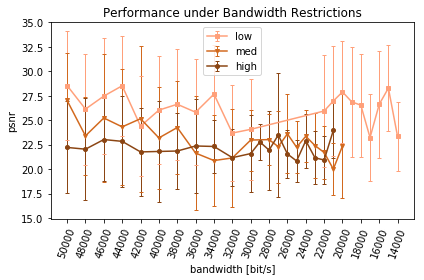

In [4]:
plotBandwidth("psnr")

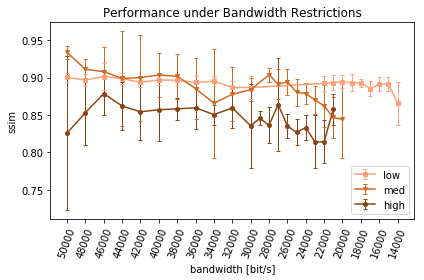

In [5]:
plotBandwidth("ssim")

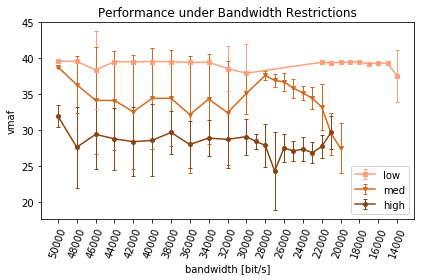

In [6]:
plotBandwidth("vmaf")

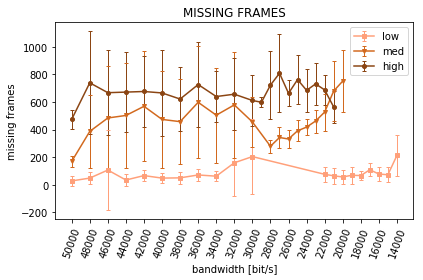

In [7]:
label = "frames_missing"
plotBandwidth(label)
plt.title("MISSING FRAMES")
plt.ylabel("missing frames")
plt.savefig(DIR + "/bandwidth_" + label + ".pdf")

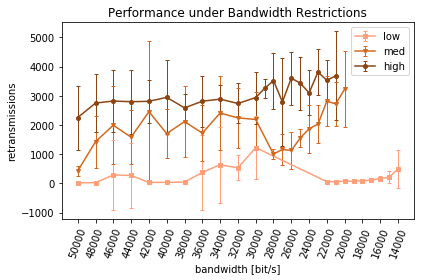

In [8]:
plotBandwidth("retransmissions")

In [9]:
df_c.to_csv(DIR + "/run_overview_means_pandas.csv")